In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [187]:
df = pd.read_csv(r"C:\Users\Lionie Sibuea\Downloads\Transjakarta data.csv")
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [188]:
pd.set_option('display.max_columns', None)  # To show all columns
pd.set_option('display.width', 1000)       # Adjust the display

print(df)


              transID            payCardID payCardBank             payCardName payCardSex  payCardBirthDate corridorID                              corridorName  direction tapInStops          tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq            tapInTime tapOutStops        tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount
0      EIIW227B8L34VB      180062659848800      emoney          Bajragin Usada          M              2008          5                     Matraman Baru - Ancol        1.0     P00142               Pal Putih      -6.184631      106.84402             7  2023-04-03 05:21:44      P00253                Tegalan       -6.203101       106.85715        12.0  2023-04-03 06:00:53     3500.0
1      LGXO740D2N47GZ     4885331907664776         dki            Gandi Widodo          F              1997         6C  Stasiun Tebet - Karet via Patra Kuningan        0.0    B01963P              Kemenkes 2      -6.228700      106.833

In [189]:
#Data Cleansing
len(df[df['payAmount'].isna()])

1007

In [190]:
len(df[df['tapOutStops'].isna()])

2289

In [191]:
df['payAmount_copy'] = df['tapOutStops'].apply(lambda x: 20000 if x is np.nan else np.nan)
df['payAmount'] = df['payAmount'].fillna(df['payAmount_copy'])
df.drop(labels='payAmount_copy', axis=1, inplace=True)


In [192]:
df[df['tapOutStops'] == np.nan]['payAmount']


Series([], Name: payAmount, dtype: float64)

In [193]:
len(df[df['payAmount'].isna()])


946

In [194]:
df['corridorID'] = df['corridorID'].apply(lambda x: None if x is np.nan else x)
df['corridorID'] = df['corridorID'].apply(lambda x: str(x).replace("JAK.", "") if x is not None else None)

In [195]:
df_corr_info = df[['corridorID', 'corridorName']].copy()
df_corr_info.dropna(how="all", inplace=True)
df_corr_info.head()

,corridorID,corridorName
0,5,Matraman Baru - Ancol
1,6C,Stasiun Tebet - Karet via Patra Kuningan
2,R1A,Pantai Maju - Kota
3,11D,Pulo Gebang - Pulo Gadung 2 via PIK
4,12,Tanjung Priok - Pluit


In [196]:
len(df_corr_info)

36775

In [197]:
df_corr_info.drop_duplicates(inplace=True)

In [198]:
len(df_corr_info)

520

In [199]:
#Filling the blanks (corr_name with known corr_name)
for i in range(0, len(df_corr_info)):
    corr_ids = df_corr_info.iloc[i, 0]
    corr_name = df_corr_info[df_corr_info['corridorID'] == corr_ids]['corridorName'].dropna().values 
    if len(corr_name) > 0:
        df_corr_info.iloc[i, 1] = corr_name[0] 

In [200]:
#Filling the blanks (corr_ids with known corr_ids)
for i in range(0, len(df_corr_info)):
    corr_name = df_corr_info.iloc[i, 1]
    corr_ids = df_corr_info[df_corr_info['corridorName'] == corr_name]['corridorID'].dropna().values
    if len(corr_ids) > 0:
        df_corr_info.iloc[i, 0] = corr_ids[0]

In [201]:
df_corr_info.drop_duplicates(subset='corridorName', inplace=True)
df_corr_info.drop_duplicates(subset='corridorID', inplace=True)
df_corr_info.dropna(how='any')
df_corr_info.reset_index(inplace=True, drop=True)
df_corr_info.columns = ['corridorID', 'corridorName_TRUE']

In [202]:
df = pd.merge(
    left = df,
    right = df_corr_info,
    on = 'corridorID'
)

In [203]:
df['corridorName'] = df['corridorName'].fillna(df['corridorName_TRUE'])
df.drop('corridorName_TRUE', axis=1, inplace=True)

In [204]:
df['tapOutStops'] = df['tapOutStops'].apply(lambda x: df['tapOutStops'].mode().values[0] if x is np.nan else x)
df['tapInStops'] = df['tapInStops'].apply(lambda x: df['tapInStops'].mode().values[0] if x is np.nan else x)


In [205]:
df=df.drop(labels=['tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon'], axis=1)

In [206]:
#changing the birthdate to string
df['payCardBirthDate']=df['payCardBirthDate'].astype(str)


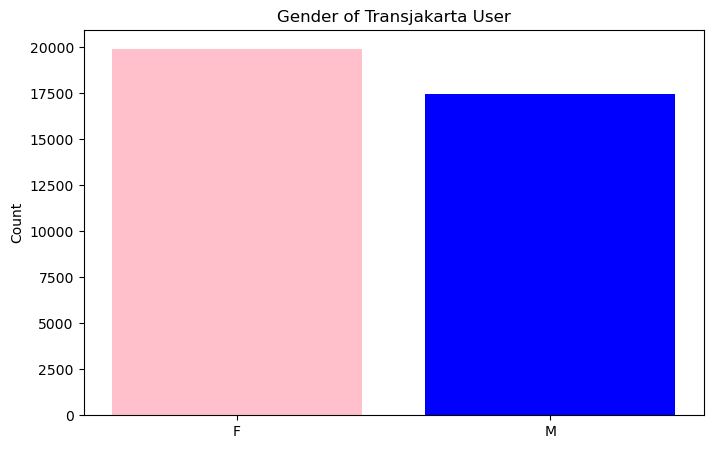

In [207]:
#How Many Male and Female who rode Transjakarta
gender_counts = df['payCardSex'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(
    x=gender_counts.index,
    height=gender_counts,
    color=['pink', 'blue']
)

plt.title('Gender of Transjakarta User')
plt.ylabel('Count')
plt.show()

#Based on the data there are more females Transjakarta user

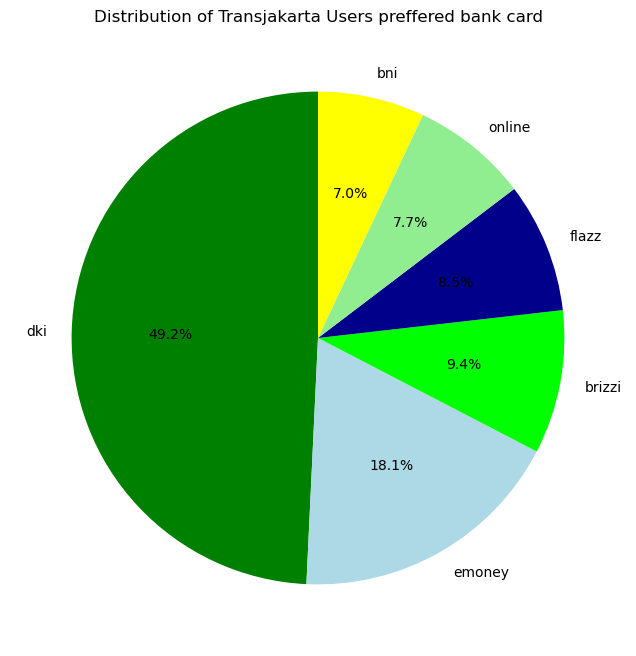

In [208]:
import matplotlib.pyplot as plt
bank_type = df['payCardBank'].value_counts()

#Making the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    bank_type,
    labels = bank_type.index,
    autopct ='%1.1f%%',
    colors =['green', 'lightblue', 'lime', 'darkblue', 'lightgreen', 'yellow'],
    startangle=90
)
plt.title('Distribution of Transjakarta Users preffered bank card')
plt.show()

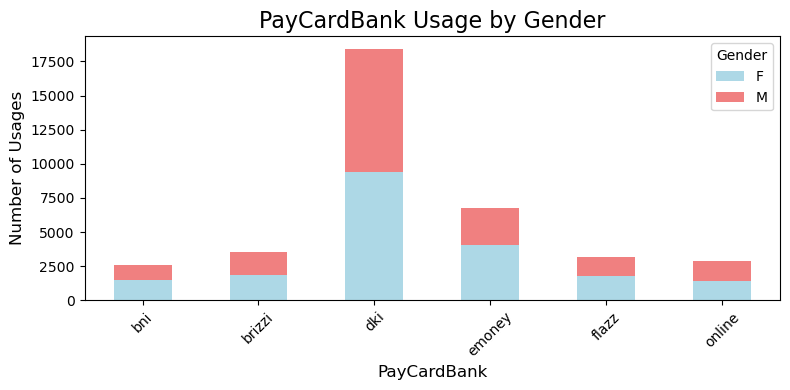

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

bank_gender_usage = df.groupby(['payCardBank', 'payCardSex']).size().unstack(fill_value=0)

bank_gender_usage.plot(kind='bar', stacked=True, figsize=(8, 4), color=['lightblue', 'lightcoral'])

plt.title('PayCardBank Usage by Gender', fontsize=16)
plt.xlabel('PayCardBank', fontsize=12)
plt.ylabel('Number of Usages', fontsize=12)

plt.legend(title='Gender')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [210]:
df.to_excel('Transjakarta_Cleansed.xlsx',index=False)